In [75]:
%%html
<style>
table {float:left}
</style>

# Project 1


## Let's get started with our dataset

#### 1. Create a data dictionary

|Variable | Description | Type of Variable
| :- | --- | ---
|Admission Decision (admit) | 0 = Not Admitted, 1 = Admitted | Categorical, Outcome
|GRE (gre) | GRE Test Scores (220 - 800) | Continuous Covariate
|GPA (gpa) | Grade Point Average(2.26 - 4.00) | Continuous Covariate
|College Rank (prestige) | Rank of College | Categorical, Ordered, Predictor


#### 2. What is the outcome?


Answer: Admissions Decision - Whether or not an applicant is admitted.  We are assuming the convention that 0 is False and 1 is True in the data file.

#### 3. What are the predictors/covariates? 

Answer: Applicant's Grade Point Average, GRE scores and the prestige rank of the school to which he has applied are all predictors.  GPA and GRE are continuous predictors / covariates.

#### 4. What timeframe is this data relevent for?

Answer: Unclear in source materials provided.  Did I miss something?   Let's assume this is a cross-sectional subsampling of admissions data for 1st semester, last year for U.S. 4 year colleges.

#### 4. What is the hypothesis?

Answer:That likelihood of admission to U.S. 4 year colleges is positively correlated with both GPA and GRE, and negatively correlated with highly prestigious schools. 

## Problem Statement

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: 
* detection of mistakes
* checking of assumptions
* preliminary selection of appropriate models
* determining relationships among the explanatory variables, and
* assessing the direction and rough size of relationships between explanatory and outcome variables.

#### 2a. What are the assumptions of the distribution of data? 

Answer:  Predictors are normal distributions.  Assume linear relationships.

#### 2b. How will determine the distribution of your data? 

Answer:  Descriptive Stats, and then a visual check of the density plot of the range of various predictors.


In [70]:
%matplotlib inline

import pandas as pd
import os
import matplotlib.pyplot as pyplt

data = pd.read_csv(os.path.join( '..', 'assets', 'admissions.csv'))

prestige_strs = data.prestige.map({1:'tier1', 2:'tier2', 3:'tier3',4:'tier4'})
#create three dummy variables using get_dummies, then exclude the first dummy column


prestige_dummies = pd.get_dummies(prestige_strs, prefix='prestige').iloc[:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, prestige_dummies], axis=1)


In [71]:
data.describe()

,admit,gre,gpa,prestige,prestige_tier1,prestige_tier2,prestige_tier3,prestige_tier4
count,400.000000,398.000000,398.00000,399.000000,400.000000,400.000000,400.000000,400.000000
mean,0.317500,588.040201,3.39093,2.486216,0.152500,0.375000,0.302500,0.167500
std,0.466087,115.628513,0.38063,0.945333,0.359955,0.484729,0.459916,0.373889
min,0.000000,220.000000,2.26000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
50%,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
75%,1.000000,NaN,NaN,NaN,0.000000,1.000000,1.000000,0.000000
max,1.000000,800.000000,4.00000,4.000000,1.000000,1.000000,1.000000,1.000000


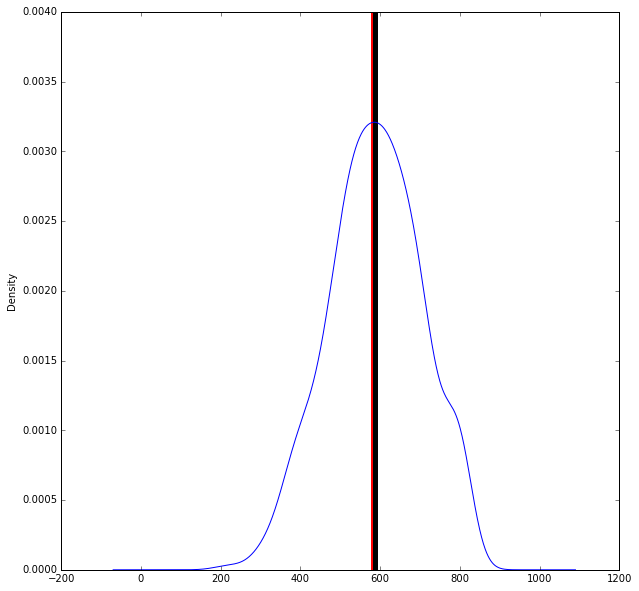

In [69]:


data.gre.plot(kind="density",figsize=(10,10))
pyplt.vlines(data.gre.mean(),   # Plot black line at mean
           ymin=0, 
           ymax=0.004,
           linewidth=5.0)

pyplt.vlines(data.gre.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.004, 
           linewidth=2.0,
           color="red")


#### 3a. How might outliers impact your analysis? 

Answer: Outliers can create bias by skewing, spiking, or flattening our data.

#### 3b. How will you test for outliers? 

Answer: Box diagrams and the whiskers will tell you where most of your data is, and whether you have outliers.

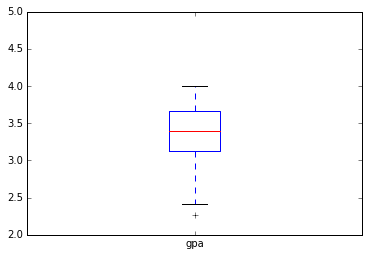

In [53]:
data.gpa.plot(kind='box',ylim=(2,5))

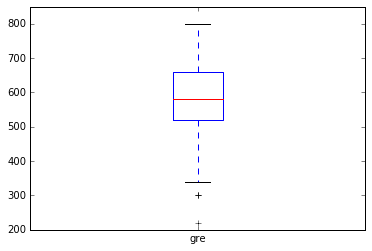

In [57]:
data.gre.plot(kind='box',ylim=(200,850))

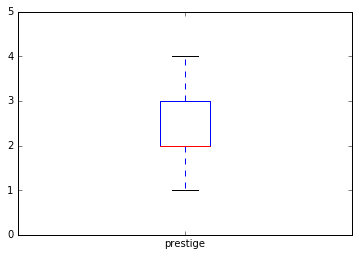

In [74]:
data.prestige.plot(kind='box',ylim=(0,5))

#### 4a. What is colinearity? 

Answer: Colinearity is when one of your predictors is a function of another.

#### 4b. How will you test for colinearity? 

Answer: Strongly correlated predictors are a good test.  Linear Regression analysis (least squares or other) between predictors will do this.

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Using the admissions dataset and assumptions / confabulations regarding its provenance, I'd run preliminary statistics on the sample for mean, median, mode, stdev, and quartiles.  I'd do box plots for a visual view of outliers, per predictor.  I'd plot the column range densities against mean and median.

After filtering outliers, I'd check how various predictors correlate with each other to test linearity, and then check how various predictors correlate with outcomes (admission).

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model